In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime 
import folium

In [2]:
df = pd.read_csv('yellow_tripdata_2016-03.csv')
#pd.set_option('display.float_format', '{:,.15f}'.format)

In [3]:
df = df.sample(n=20000, random_state=42)

# Save the new CSV file
df.to_csv('yellow_tripdata_2016-03_1.csv', index=False)

In [4]:
df.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8552729,1,2016-03-09 01:04:27,2016-03-09 01:09:26,1,1.40,-74.000168,40.732841,1,N,-73.990814,40.750275,1,6.5,0.5,0.5,1.00,0.00,0.3,8.80
11689427,2,2016-03-30 18:40:44,2016-03-30 18:53:48,6,1.93,-73.981552,40.773876,1,N,-73.963264,40.757622,1,10.5,1.0,0.5,3.08,0.00,0.3,15.38
6874954,1,2016-03-21 06:44:49,2016-03-21 06:54:34,1,2.00,-73.984215,40.740009,1,N,-73.984634,40.760223,1,9.0,0.0,0.5,1.00,0.00,0.3,10.80
7364418,1,2016-03-22 12:57:22,2016-03-22 13:10:15,1,0.90,-73.992004,40.750504,1,N,-73.981766,40.746933,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80
9941087,1,2016-03-25 23:15:18,2016-03-25 23:19:04,2,0.50,-73.982094,40.766399,1,N,-73.986855,40.764229,1,4.5,0.5,0.5,1.15,0.00,0.3,6.95
10538446,2,2016-03-27 14:05:15,2016-03-27 14:54:04,1,18.02,-73.955643,40.804268,2,N,-73.784172,40.643501,1,52.0,0.0,0.5,11.67,5.54,0.3,70.01
4778583,2,2016-03-16 09:38:27,2016-03-16 09:48:39,2,0.73,-73.991539,40.749649,1,N,-73.990021,40.756710,2,7.5,0.0,0.5,0.00,0.00,0.3,8.30
7242106,1,2016-03-22 06:07:32,2016-03-22 06:46:55,2,17.20,-73.788177,40.642048,2,N,-73.978157,40.751198,1,52.0,0.0,0.5,10.00,5.54,0.3,68.34
592121,1,2016-03-02 10:59:38,2016-03-02 11:41:48,1,10.50,-74.002762,40.718597,1,N,-73.939095,40.848618,2,38.5,0.0,0.5,0.00,0.00,0.3,39.30
4868631,1,2016-03-16 14:31:41,2016-03-16 14:57:35,1,3.50,-73.983788,40.743813,1,N,-74.008141,40.703522,1,17.5,0.0,0.5,3.65,0.00,0.3,21.95


In [5]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
10557736,1,2016-03-27 15:08:52,2016-03-27 15:13:17,1,0.50,-73.984329,40.725151,1,N,-73.988426,40.718460,1,5.0,0.0,0.5,0.00,0.00,0.3,5.80
7714021,2,2016-03-23 11:51:00,2016-03-23 12:05:01,1,0.91,-73.994087,40.741070,1,N,-73.994453,40.750648,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
2577447,2,2016-03-06 20:37:43,2016-03-06 20:56:03,1,10.43,-73.874496,40.774109,1,N,-73.974083,40.753380,1,29.0,0.5,0.5,8.96,5.54,0.3,44.80
4438081,1,2016-03-15 12:08:22,2016-03-15 12:53:01,1,11.70,-73.872704,40.774269,1,N,-73.983513,40.750534,1,43.5,0.0,0.5,9.95,5.54,0.3,59.79
516516,1,2016-03-02 07:20:25,2016-03-02 07:26:12,1,1.30,-73.981735,40.740677,1,N,-73.974678,40.755955,1,6.5,0.0,0.5,2.00,0.00,0.3,9.30
5334576,1,2016-03-17 18:23:19,2016-03-17 18:27:01,1,1.00,-73.993233,40.729645,1,N,-74.003510,40.718220,2,5.0,1.0,0.5,0.00,0.00,0.3,6.80
7887549,2,2016-03-23 19:26:05,2016-03-23 19:52:43,2,7.30,-73.952248,40.781330,1,N,-74.010109,40.720139,1,25.0,1.0,0.5,2.50,0.00,0.3,29.30
9701682,2,2016-03-25 06:11:31,2016-03-25 06:14:33,2,0.40,-73.964081,40.757000,1,N,-73.971474,40.757999,2,4.0,0.0,0.5,0.00,0.00,0.3,4.80
4072442,2,2016-03-10 03:05:38,2016-03-10 03:11:40,6,1.87,-73.980949,40.764370,1,N,-73.962486,40.770248,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
2925430,2,2016-03-12 01:23:22,2016-03-12 01:31:05,1,2.09,-73.995804,40.748997,1,N,-73.971466,40.761559,2,8.5,0.5,0.5,0.00,0.00,0.3,9.80


In [6]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
10557736,1,2016-03-27 15:08:52,2016-03-27 15:13:17,1,0.50,-73.984329,40.725151,1,N,-73.988426,40.718460,1,5.0,0.0,0.5,0.00,0.00,0.3,5.80
7714021,2,2016-03-23 11:51:00,2016-03-23 12:05:01,1,0.91,-73.994087,40.741070,1,N,-73.994453,40.750648,1,10.0,0.0,0.5,2.16,0.00,0.3,12.96
2577447,2,2016-03-06 20:37:43,2016-03-06 20:56:03,1,10.43,-73.874496,40.774109,1,N,-73.974083,40.753380,1,29.0,0.5,0.5,8.96,5.54,0.3,44.80
4438081,1,2016-03-15 12:08:22,2016-03-15 12:53:01,1,11.70,-73.872704,40.774269,1,N,-73.983513,40.750534,1,43.5,0.0,0.5,9.95,5.54,0.3,59.79
516516,1,2016-03-02 07:20:25,2016-03-02 07:26:12,1,1.30,-73.981735,40.740677,1,N,-73.974678,40.755955,1,6.5,0.0,0.5,2.00,0.00,0.3,9.30
5334576,1,2016-03-17 18:23:19,2016-03-17 18:27:01,1,1.00,-73.993233,40.729645,1,N,-74.003510,40.718220,2,5.0,1.0,0.5,0.00,0.00,0.3,6.80
7887549,2,2016-03-23 19:26:05,2016-03-23 19:52:43,2,7.30,-73.952248,40.781330,1,N,-74.010109,40.720139,1,25.0,1.0,0.5,2.50,0.00,0.3,29.30
9701682,2,2016-03-25 06:11:31,2016-03-25 06:14:33,2,0.40,-73.964081,40.757000,1,N,-73.971474,40.757999,2,4.0,0.0,0.5,0.00,0.00,0.3,4.80
4072442,2,2016-03-10 03:05:38,2016-03-10 03:11:40,6,1.87,-73.980949,40.764370,1,N,-73.962486,40.770248,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
2925430,2,2016-03-12 01:23:22,2016-03-12 01:31:05,1,2.09,-73.995804,40.748997,1,N,-73.971466,40.761559,2,8.5,0.5,0.5,0.00,0.00,0.3,9.80


In [7]:
df.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8552729,1,2016-03-09 01:04:27,2016-03-09 01:09:26,1,1.40,-74.000168,40.732841,1,N,-73.990814,40.750275,1,6.5,0.5,0.5,1.00,0.00,0.3,8.80
11689427,2,2016-03-30 18:40:44,2016-03-30 18:53:48,6,1.93,-73.981552,40.773876,1,N,-73.963264,40.757622,1,10.5,1.0,0.5,3.08,0.00,0.3,15.38
6874954,1,2016-03-21 06:44:49,2016-03-21 06:54:34,1,2.00,-73.984215,40.740009,1,N,-73.984634,40.760223,1,9.0,0.0,0.5,1.00,0.00,0.3,10.80
7364418,1,2016-03-22 12:57:22,2016-03-22 13:10:15,1,0.90,-73.992004,40.750504,1,N,-73.981766,40.746933,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80
9941087,1,2016-03-25 23:15:18,2016-03-25 23:19:04,2,0.50,-73.982094,40.766399,1,N,-73.986855,40.764229,1,4.5,0.5,0.5,1.15,0.00,0.3,6.95
10538446,2,2016-03-27 14:05:15,2016-03-27 14:54:04,1,18.02,-73.955643,40.804268,2,N,-73.784172,40.643501,1,52.0,0.0,0.5,11.67,5.54,0.3,70.01
4778583,2,2016-03-16 09:38:27,2016-03-16 09:48:39,2,0.73,-73.991539,40.749649,1,N,-73.990021,40.756710,2,7.5,0.0,0.5,0.00,0.00,0.3,8.30
7242106,1,2016-03-22 06:07:32,2016-03-22 06:46:55,2,17.20,-73.788177,40.642048,2,N,-73.978157,40.751198,1,52.0,0.0,0.5,10.00,5.54,0.3,68.34
592121,1,2016-03-02 10:59:38,2016-03-02 11:41:48,1,10.50,-74.002762,40.718597,1,N,-73.939095,40.848618,2,38.5,0.0,0.5,0.00,0.00,0.3,39.30
4868631,1,2016-03-16 14:31:41,2016-03-16 14:57:35,1,3.50,-73.983788,40.743813,1,N,-74.008141,40.703522,1,17.5,0.0,0.5,3.65,0.00,0.3,21.95


In [8]:
df = df.drop(["VendorID","tpep_pickup_datetime","tpep_dropoff_datetime","store_and_fwd_flag","improvement_surcharge","total_amount","mta_tax","RatecodeID","payment_type",], axis=1)

In [9]:
df.head(10)

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,tip_amount,tolls_amount
10557736,1,0.50,-73.984329,40.725151,-73.988426,40.718460,5.0,0.0,0.00,0.00
7714021,1,0.91,-73.994087,40.741070,-73.994453,40.750648,10.0,0.0,2.16,0.00
2577447,1,10.43,-73.874496,40.774109,-73.974083,40.753380,29.0,0.5,8.96,5.54
4438081,1,11.70,-73.872704,40.774269,-73.983513,40.750534,43.5,0.0,9.95,5.54
516516,1,1.30,-73.981735,40.740677,-73.974678,40.755955,6.5,0.0,2.00,0.00
5334576,1,1.00,-73.993233,40.729645,-74.003510,40.718220,5.0,1.0,0.00,0.00
7887549,2,7.30,-73.952248,40.781330,-74.010109,40.720139,25.0,1.0,2.50,0.00
9701682,2,0.40,-73.964081,40.757000,-73.971474,40.757999,4.0,0.0,0.00,0.00
4072442,6,1.87,-73.980949,40.764370,-73.962486,40.770248,7.5,0.5,0.00,0.00
2925430,1,2.09,-73.995804,40.748997,-73.971466,40.761559,8.5,0.5,0.00,0.00


In [10]:
if (df['pickup_latitude'] == 0.0).any():
    print("Column has values equal to 0.0. Removing rows...")
    df = df[df['pickup_latitude'] != 0.0]
else:
    print("Column does not have values equal to 0.0")

Column has values equal to 0.0. Removing rows...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19674 entries, 10557736 to 4868631
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   passenger_count    19674 non-null  int64  
 1   trip_distance      19674 non-null  float64
 2   pickup_longitude   19674 non-null  float64
 3   pickup_latitude    19674 non-null  float64
 4   dropoff_longitude  19674 non-null  float64
 5   dropoff_latitude   19674 non-null  float64
 6   fare_amount        19674 non-null  float64
 7   extra              19674 non-null  float64
 8   tip_amount         19674 non-null  float64
 9   tolls_amount       19674 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


In [12]:
#df = df.sample(frac=0.25, random_state=42)
#df

In [13]:
df.head(10)

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,tip_amount,tolls_amount
10557736,1,0.50,-73.984329,40.725151,-73.988426,40.718460,5.0,0.0,0.00,0.00
7714021,1,0.91,-73.994087,40.741070,-73.994453,40.750648,10.0,0.0,2.16,0.00
2577447,1,10.43,-73.874496,40.774109,-73.974083,40.753380,29.0,0.5,8.96,5.54
4438081,1,11.70,-73.872704,40.774269,-73.983513,40.750534,43.5,0.0,9.95,5.54
516516,1,1.30,-73.981735,40.740677,-73.974678,40.755955,6.5,0.0,2.00,0.00
5334576,1,1.00,-73.993233,40.729645,-74.003510,40.718220,5.0,1.0,0.00,0.00
7887549,2,7.30,-73.952248,40.781330,-74.010109,40.720139,25.0,1.0,2.50,0.00
9701682,2,0.40,-73.964081,40.757000,-73.971474,40.757999,4.0,0.0,0.00,0.00
4072442,6,1.87,-73.980949,40.764370,-73.962486,40.770248,7.5,0.5,0.00,0.00
2925430,1,2.09,-73.995804,40.748997,-73.971466,40.761559,8.5,0.5,0.00,0.00


In [14]:
df.isnull().sum()

passenger_count      0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
fare_amount          0
extra                0
tip_amount           0
tolls_amount         0
dtype: int64

In [15]:
df.head(5)

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,tip_amount,tolls_amount
10557736,1,0.50,-73.984329,40.725151,-73.988426,40.718460,5.0,0.0,0.00,0.00
7714021,1,0.91,-73.994087,40.741070,-73.994453,40.750648,10.0,0.0,2.16,0.00
2577447,1,10.43,-73.874496,40.774109,-73.974083,40.753380,29.0,0.5,8.96,5.54
4438081,1,11.70,-73.872704,40.774269,-73.983513,40.750534,43.5,0.0,9.95,5.54
516516,1,1.30,-73.981735,40.740677,-73.974678,40.755955,6.5,0.0,2.00,0.00


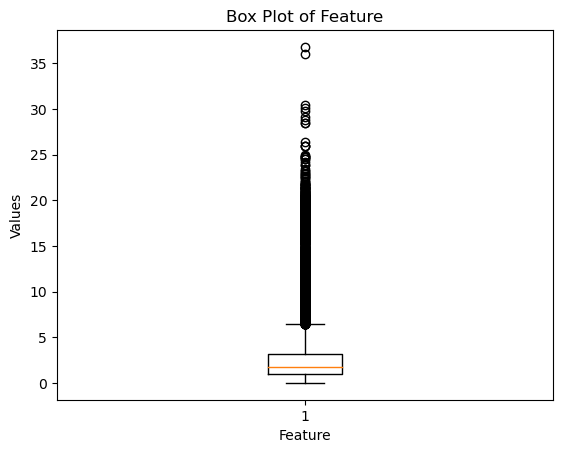

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,tip_amount,tolls_amount
4619648,1,16.52,-73.781868,40.644699,-73.961250,40.760109,52.0,0.0,8.00,0.00
3315448,2,17.54,-73.788231,40.647423,-73.977325,40.760841,52.0,0.0,11.67,5.54
5540676,1,18.40,-73.782089,40.644665,-73.990601,40.734913,52.0,0.0,11.65,5.54
11643343,1,17.40,-73.990555,40.756908,-73.776382,40.645817,52.0,4.5,12.55,5.54
3736475,2,21.33,-73.995880,40.764069,-73.790428,40.646740,52.0,0.0,0.00,5.54
10633025,2,18.70,-73.788086,40.641823,-73.987244,40.768711,52.0,0.0,7.20,0.00
9794133,2,17.80,-73.789627,40.643669,-73.989136,40.758793,52.0,4.5,0.00,5.54
9151305,1,15.60,-73.986435,40.761379,-73.856804,40.836216,47.5,0.5,0.00,0.00
3349659,1,20.62,-73.776672,40.645397,-73.967514,40.792988,52.0,0.0,5.00,5.54
3107750,1,20.43,-73.781303,40.644962,-74.000381,40.719921,52.0,0.0,0.00,0.00


In [16]:

# Select the feature column for outlier analysis
feature = df['trip_distance']

# Create a box plot to visualize the distribution of the feature
plt.boxplot(feature)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Feature')
plt.show()

# Calculate z-scores for the feature
z_scores = (feature - feature.mean()) / feature.std()

# Define the threshold for considering a data point as an outlier
threshold = 3

# Identify outliers based on z-scores
outliers = df[z_scores.abs() > threshold]

# Display the outliers
outliers.head(10)


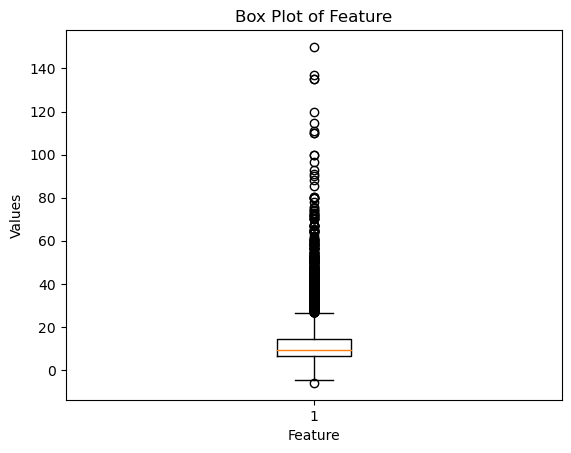

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,tip_amount,tolls_amount
4619648,1,16.52,-73.781868,40.644699,-73.961250,40.760109,52.0,0.0,8.00,0.00
3315448,2,17.54,-73.788231,40.647423,-73.977325,40.760841,52.0,0.0,11.67,5.54
5540676,1,18.40,-73.782089,40.644665,-73.990601,40.734913,52.0,0.0,11.65,5.54
11643343,1,17.40,-73.990555,40.756908,-73.776382,40.645817,52.0,4.5,12.55,5.54
2802461,1,0.04,-73.976357,40.748421,-73.976181,40.748871,52.0,4.5,12.57,5.54
3736475,2,21.33,-73.995880,40.764069,-73.790428,40.646740,52.0,0.0,0.00,5.54
10633025,2,18.70,-73.788086,40.641823,-73.987244,40.768711,52.0,0.0,7.20,0.00
9794133,2,17.80,-73.789627,40.643669,-73.989136,40.758793,52.0,4.5,0.00,5.54
9151305,1,15.60,-73.986435,40.761379,-73.856804,40.836216,47.5,0.5,0.00,0.00
3349659,1,20.62,-73.776672,40.645397,-73.967514,40.792988,52.0,0.0,5.00,5.54


In [17]:
# Select the feature column for outlier analysis
feature = df['fare_amount']

# Create a box plot to visualize the distribution of the feature
plt.boxplot(feature)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Feature')
plt.show()

# Calculate z-scores for the feature
z_scores = (feature - feature.mean()) / feature.std()

# Define the threshold for considering a data point as an outlier
threshold = 3

# Identify outliers based on z-scores
outliers = df[z_scores.abs() > threshold]

# Display the outliers
outliers.head(10)

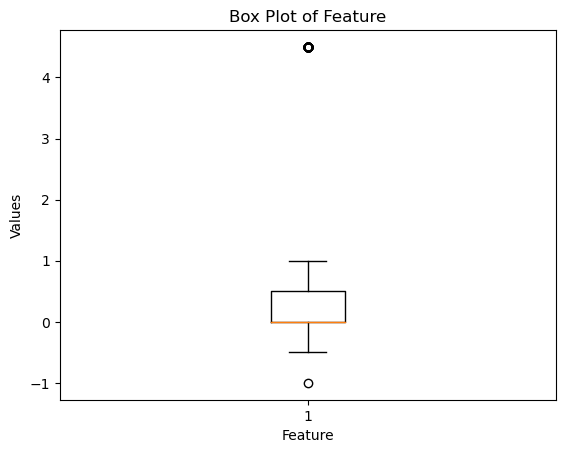

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,tip_amount,tolls_amount
11643343,1,17.40,-73.990555,40.756908,-73.776382,40.645817,52.0,4.5,12.55,5.54
2802461,1,0.04,-73.976357,40.748421,-73.976181,40.748871,52.0,4.5,12.57,5.54
9794133,2,17.80,-73.789627,40.643669,-73.989136,40.758793,52.0,4.5,0.00,5.54
3556352,6,18.86,-73.776718,40.645168,-73.985703,40.721947,52.0,4.5,8.50,0.00
7132207,2,21.30,-73.977654,40.764317,-73.789871,40.643154,52.0,4.5,0.00,5.54
1146695,1,16.27,-73.978615,40.752201,-73.785614,40.643192,52.0,4.5,5.00,5.54
2356935,1,21.96,-73.787849,40.642372,-73.984314,40.779984,52.0,4.5,8.00,5.54
7060856,1,19.47,-73.782120,40.644672,-74.000320,40.719898,52.0,4.5,12.57,5.54
1122721,2,22.50,-73.976250,40.744678,-73.783745,40.643780,52.0,4.5,12.55,5.54
1196881,2,17.40,-73.782181,40.644550,-73.985611,40.750328,52.0,4.5,0.00,5.54


In [18]:
# Select the feature column for outlier analysis
feature = df['extra']

# Create a box plot to visualize the distribution of the feature
plt.boxplot(feature)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Feature')
plt.show()

# Calculate z-scores for the feature
z_scores = (feature - feature.mean()) / feature.std()

# Define the threshold for considering a data point as an outlier
threshold = 3

# Identify outliers based on z-scores
outliers = df[z_scores.abs() > threshold]

# Display the outliers
outliers.head(10)

In [19]:

X = df[["passenger_count","trip_distance","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]]
y = df["fare_amount"]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[-5.02259140e-01, -1.87970808e-01, -1.12899042e+00,
        -1.58441878e+00, -4.26126953e-02,  1.26999973e-03],
       [-5.02259140e-01, -9.06562126e-02, -8.60497596e-01,
         1.35293217e-02, -3.55002172e-02,  3.64876347e-02],
       [-5.02259140e-01,  1.06753396e-01, -9.66011524e-03,
         4.30594326e-01, -4.44380461e-02,  1.71365931e-02],
       ...,
       [-5.02259140e-01, -6.21715863e-01, -5.39933439e-01,
        -1.38433195e+00, -4.28043988e-02,  1.64281055e-02],
       [ 2.61332228e-01,  1.20501812e+00,  5.25462983e+00,
        -3.80762107e+00,  9.10835648e-03, -1.65471795e-03],
       [-5.02259140e-01, -5.46644604e-01,  6.64012784e-01,
         9.63976109e-01, -3.18828553e-02,  5.05817483e-02]])

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Performance of Testing\n")
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)
adj_r2_test = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f'Testing adjusted R2 score: {adj_r2_test:.3f}')
y_predi = reg.predict(X_train)

print("\nPerformance of Training\n")
msei = mean_squared_error(y_train, y_predi)
print("Mean Squared Error:", msei)
r2i = r2_score(y_train, y_predi)
print('R-squared:', r2i) 
adj_r2_train = 1 - (1 - r2i) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
print(f'Training adjusted R2 score: {adj_r2_train:.3f}')

Performance of Testing

Mean Squared Error: 10.18108597183032
R-squared: 0.9039325550697033
Testing adjusted R2 score: 0.904

Performance of Training

Mean Squared Error: 16.199376141845576
R-squared: 0.8598519748837736
Training adjusted R2 score: 0.860


In [25]:
df1=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})

In [26]:
df1.head(10)

,Actual,Predicted
4244628,14.0,9.324265
5158466,8.5,7.670747
891044,7.5,7.136547
2935702,14.0,15.172531
2037447,6.5,8.615080
10141370,8.5,8.308389
1540980,7.5,6.665371
4307725,8.5,9.160135
665994,14.5,10.072735
11250715,28.5,30.018136


In [27]:

import os
import sys
import pickle

projectabspathname = os.path.abspath('fare_amount_final.pickle')
print(projectabspathname)
with open(projectabspathname,'wb') as f:
    pickle.dump(reg,f)


C:\Users\Shabeeh Shakkir\Downloads\SuyML\fare_amount_final.pickle


#BACKEND

In [28]:
with open(projectabspathname, 'rb') as f:
    mlmodel = pickle.load(f)

In [33]:
x=sc.fit_transform([[1,0.50,-73.984329,40.725151, -73.988426, 40.718460  ],[1,0.50,-73.984329,40.725151, -73.988426, 40.718460  ]])
x=mlmodel.predict(x)
print(x[0])

12.717548471425461
